In [80]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten, Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [81]:
img = image.load_img(r"D:\jupyter notebook\AutismDataset\train\Autistic\Autistic.0.jpg")

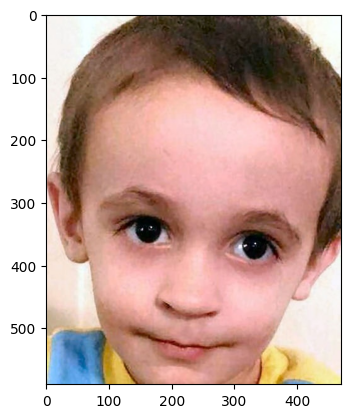

In [82]:
plt.imshow(img)

In [83]:
cv2.imread(r"D:\jupyter notebook\AutismDataset\train\Autistic\Autistic.0.jpg").shape

(590, 470, 3)

In [101]:
# Define paths to dataset directories
train_dir = r"D:\jupyter notebook\AutismDataset\train"
val_dir = r"D:\jupyter notebook\AutismDataset\valid"
test_dir = r"D:\jupyter notebook\AutismDataset\test"

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'  # Ensures labels are 0 or 1 instead of one-hot [1,0] / [0,1]
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'  # Fixes target shape mismatch
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=1,
    class_mode="binary",
    shuffle=False,
    
)
x,y = test_generator.__next__()
x.shape


Found 2540 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


(1, 200, 200, 3)

In [102]:
train_generator.class_indices

{'Autistic': 0, 'Non_Autistic': 1}

In [103]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [104]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(200, 200, 3)),  # Explicitly define input shape
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [105]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),  
              loss='binary_crossentropy', 
              metrics=['accuracy'])




In [106]:
model_fit = model.fit(train_generator,
                      steps_per_epoch=3, 
                      epochs=10,
                      validation_data=val_generator)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5247 - loss: 1.1072 - val_accuracy: 0.5000 - val_loss: 0.7682
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 711ms/step - accuracy: 0.4947 - loss: 0.7249 - val_accuracy: 0.5000 - val_loss: 0.7069
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4596 - loss: 0.6997 - val_accuracy: 0.3300 - val_loss: 0.6956
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4427 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5234 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4701 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4661 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6990
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 991ms/step - accuracy: 0.5039 - loss: 0.7025 - val_accuracy: 0.6800 - val_loss: 0.6893
Epoch 9/10

In [111]:
import os

model.save(r"D:/jupyter notebook/Saved_model/CNN_Autism.h5")

print(os.path.exists("D:/jupyter notebook/Saved_model/CNN_Autism.h5"))  # Should return True


True


In [113]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest Accuracy:', test_acc)


300/300 - 95s - 317ms/step - accuracy: 0.6433 - loss: 0.6309

Test Accuracy: 0.6433333158493042


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

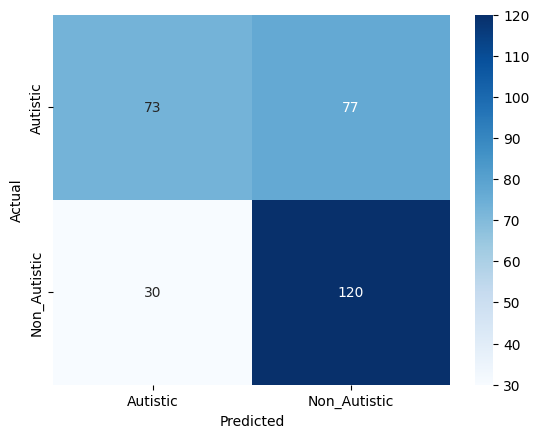

test accuracy: 64.33333333333333


In [114]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model(r"D:/jupyter notebook/Saved_model/CNN_Autism.h5")
filenames = test_generator.filenames
nb_samples =len(test_generator)
y_prob=[]
y_act=[]

test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.__next__()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys()) [i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys()) [i.argmax()] for i in y_act]

out_df = pd.DataFrame (np.vstack([predicted_class, actual_class]).T,columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')

plt.show()

print('test accuracy: {}'.format((np.diagonal (confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))